# Customer segmentation

   Z. Nogacz (November, 2020)

#### This notbook aims to analyze data from the marketing department that contains information about bank customers.

Marketing is a filar for growth and sustainability of any business. Knowlege about markets and customers is crucial for any strategic decisions, which can create a strong brand and increase sales.
Segmentation is one the most important application of unsupervised learning. Using clustering techniques, companies can identify groups of customers allowing them to understand customers behaviour and recognize a target of marceting capain. In this machine learning project, I will make use of K-Means clustering, which is the essential algorithm for clustering of unlabeled dataset. Then I will perform Principal Component Analysis (PCA) for dimensions recuction. Finally, as a comparisson, I will build  Autoencoder based on Arfificial Neural Networks in order to reduce feature dimension and then perform again KMeans clustering and PCA.

#### Keywords:
#### K-Means, Elbow Method, Principal Component Analysis (PCA), Autoencoder, Numpy, Pandas, sklearn, matplotlib, seaborn, TensorFlow, keras

### Outline

Features Information

1. Importing libraries and dataset

2. Data cleaning
       2.1. Check of extreem values
       2.2. Dealing with missing values
       2.3. Check of duplicated records
    
3. Features exploration, visualisation and scaling
       3.1. Features exploration and vizualization
       3.2. Correlations: calculation and visualization
       3.3. Data scaling

4. 'Elbow Method' - selecting the optimal number of clusters
       4.1. WCSS calculation
       4.2. Plot of WCSS vs. number of clusters

5. K-Means Method - application
       5.1. Applicaction of K-Means algorithm for 8 clusters
       5.2. Table of cluster centres with values of fearures specific for each cluster
       5.3. Inversion of scaled data into orginal data
       5.4. Characteristics of clusters – table
       5.5. Descriptions of main customer segments
       5.6. Concatanating cluster labes to original dataset
       5.7. Histograms of various clusters
        
6. Principal Component Analysis (PCA)

       6.1. Calculation of 2 Principal components
       6.2. Vizualisation of clusters after PCA
7. Autoencoder

       7.1. Creating Artificial Neural Networks (ANN)
       7.2. Copressing data with ANN
       7.3. Application of 'Elbow Method'
       7.4. Application KMeans for 4 clusters
       7.5. Application of PCA on compressed data (2 principal components)
       7.6. Visualization of 4 predicted clusters in 2D space
       7.7. Vizualisation of 4 clusters with corresponding features values (histograms)

8. Conclusion


## Features Information
1. CUSTID: Identification of Credit Card holder 
2. BALANCE: Balance amount left in customer's account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFFPURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, 
score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. PURCHASES_FREQUENCY: How frequently 
the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
10. ONEOFF_PURCHASES_FREQUENCY: How 
frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
11. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
12. CASH_ADVANCE_FREQUENCY: How 
frequently the cash in advance being paid
13. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
14. PURCHASES_TRX: Number of purchase 
transactions made
15. CREDIT_LIMIT: Limit of Credit Card for user
16. PAYMENTS: Amount of Payment done by user
17. MINIMUM_PAYMENTS: Minimum amount of 
payments made by user  
18. PRC_FULL_PAYMENT: Percent of full payment paid by user
19. TENURE: Tenure of credit card service for user

## 1. Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
raw_data = pd.read_csv('/home/zaneta/ML/20201125_Marketing/1.Original_Data/Marketing_data.csv')
raw_data.describe(include='all')
raw_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [3]:
data = raw_data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


### Insights from data

 1. BALANCE mean = 1564.5....................mean value stored at the account
 2. BALANCE_FREQUENCY mean = 0.88............almost 90% of customers update the balance feequently
 3. PURCHASES mean = 1003.21.................mean value of purchases
 4. ONEOFF_PURCHASES mean = 592.44...........mean of maximum purchase amount done in one-go
 5. INSTALLMENTS_PURCHASES mean = 411.07 mean of amount of purchase done in installment
 6. CASH_ADVANCE mean = 978.87
 7. PURCHASES_FREQUENCY mean = 0.49......almost 50% of customers requently make purchases
 8. ONEOFF_PURCHASES_FREQUENCY mean = 0.20
 9. PURCHASES_INSTALLMENTS_FREQUENCY mean = 0.36
 10. CASH_ADVANCE_FREQUENCY  mean = 0.14
 11. CASH_ADVANCE_TRX  mean = 3.25 
 12. PURCHASES_TRX  mean =  14.70
 13. CREDIT_LIMIT  mean = 4494
 14. PAYMENTS       mean = 1733
 15. MINIMUM_PAYMENTS  mean = 864
 16. PRC_FULL_PAYMENT  mean = 0.15
 17. TENURE    mean = 11.52

## 2. Data cleaning
### 2.1 Checking extreem values
Because there is a client who made purchase for 40761, I am going to check the profile of this customer if this purchase is realistic.

In [6]:
data[data['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Customer with ID C10574 uses frequently credit card, updates oft the credit card balance, so the amout of purchased transations seems to be logic. 

In [7]:
data[data['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


The customer C12226 very frequently uses cash advance. This is confirmed with 123 CASH_ADVANCE_TRX.  

### 2.2 Dealing with missing values

<AxesSubplot:>

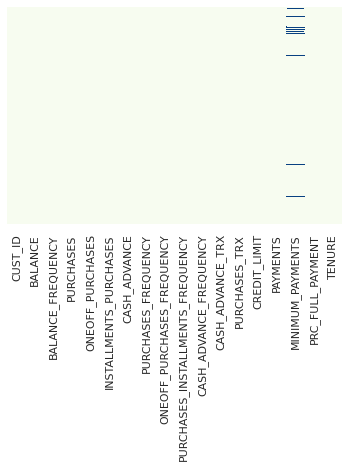

In [8]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='GnBu')

In [9]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There is 313 records with missing MINIMUM_PAYMENTS as well as one record with missing CREDIT_LIMIT value. In order to solve this problem, the missing values will be filled with their mean value.

In [10]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
#data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

In [11]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()

In [12]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 2.3 Check of duplicated records

In [13]:
data.duplicated().sum()

0

There is no duplicated records in dataset.

### 2.3 Removing customer ID column
Because customer ID is not needed for this unsupervision classification, the column with customerID will be removed from dataset.

In [14]:
data = data.drop('CUST_ID', axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3. Features exploration, visualisation and scaling
### 3.1 Features exploration and vizualization

In [15]:
len(data.columns)

17

In [16]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/home/zaneta/anaconda3/envs/py3-TF2.0/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zaneta/anaconda3/envs/py3-TF2.0/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zaneta/anaconda3/envs/py3-TF2.0/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

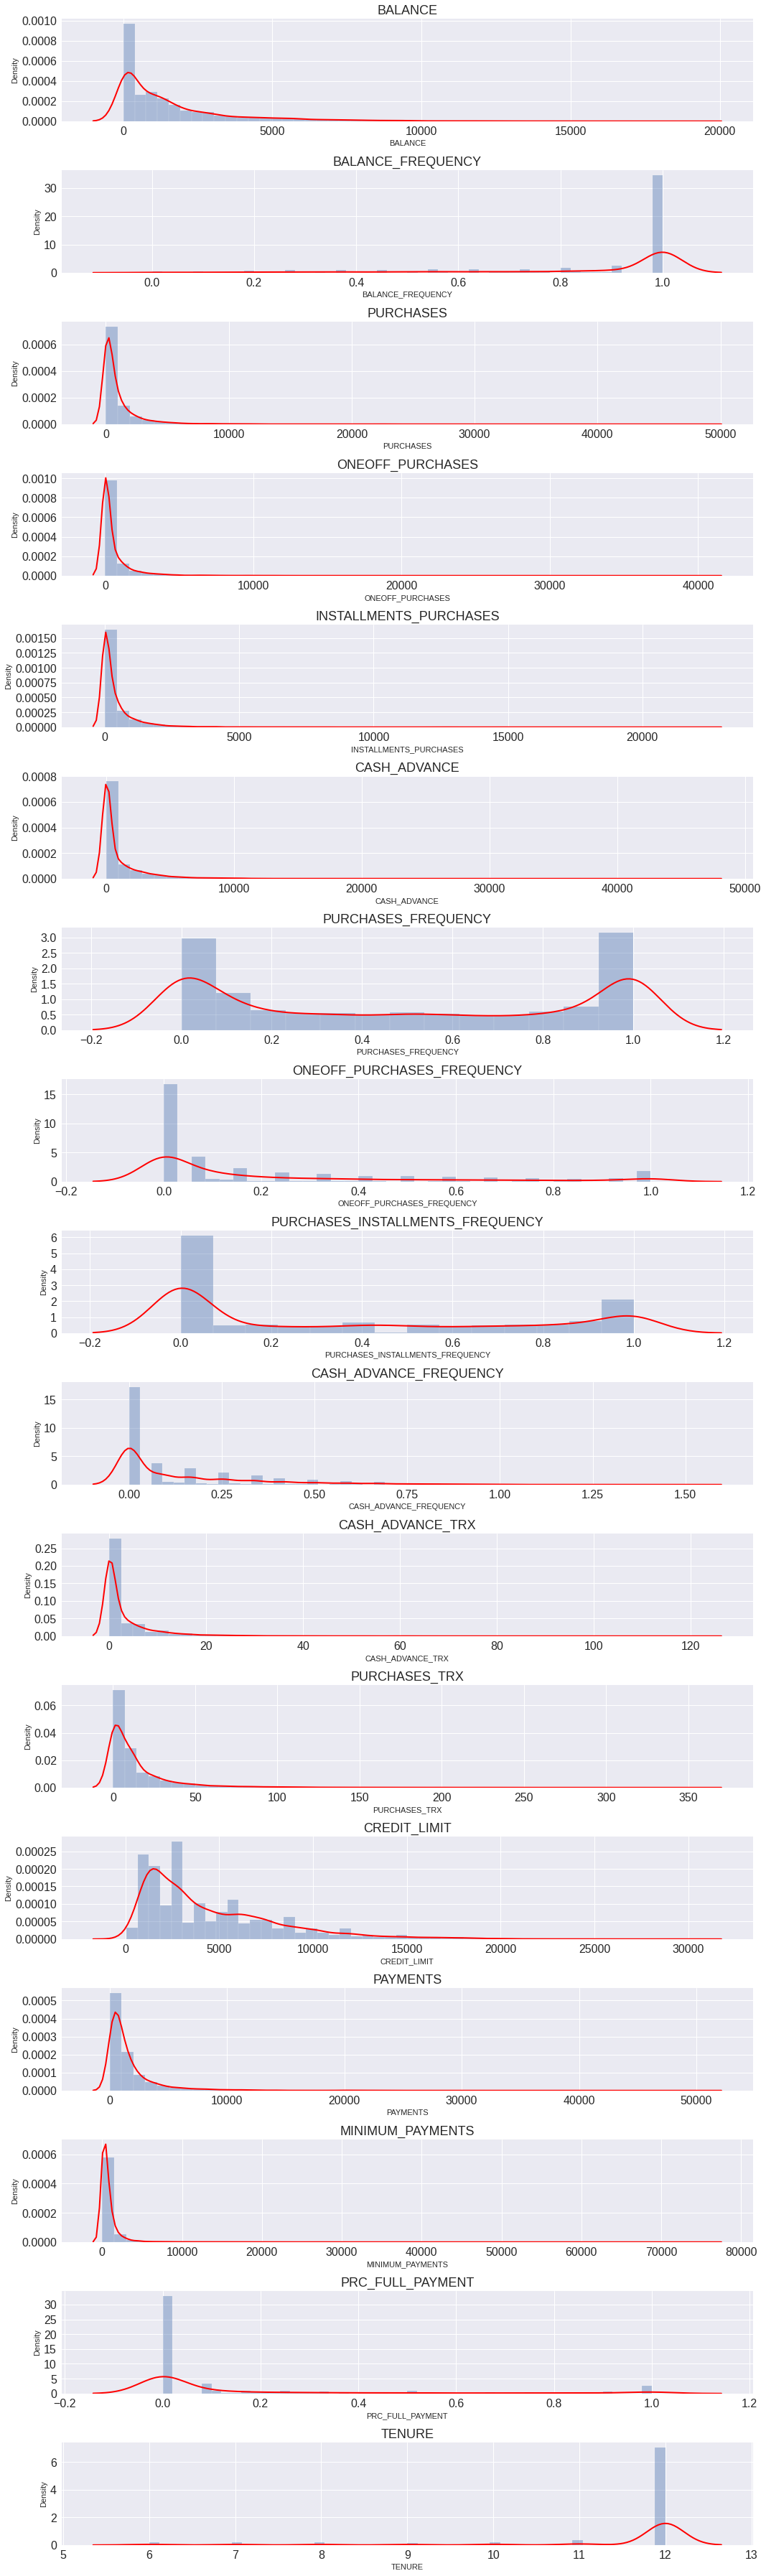

In [17]:
plt.figure(figsize=(15,50))
plt.style.use('seaborn')
for i in range(len(data.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(data[data.columns[i]], kde_kws={'color':'red', 'lw':2, 'label':'KDE'}, hist_kws={'color':'b'})
    plt.title(data.columns[i], size=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
plt.tight_layout()

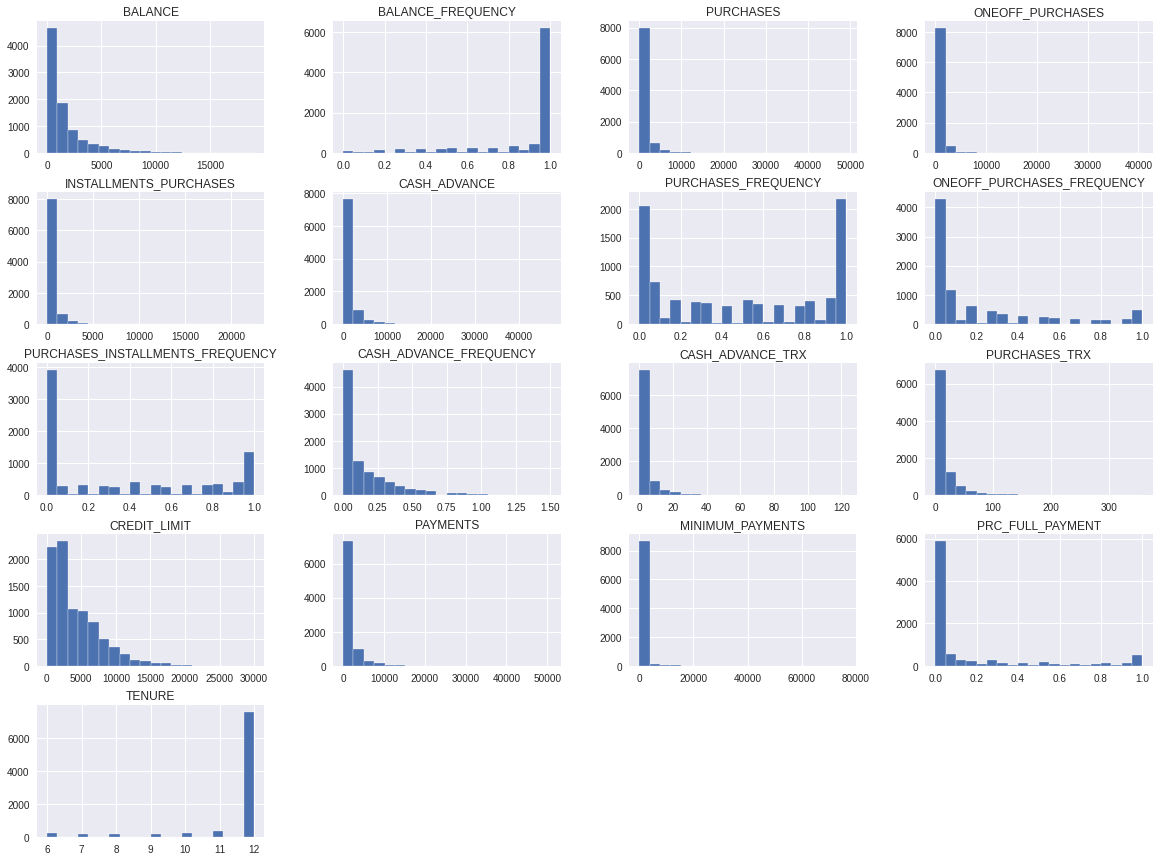

In [18]:
data.hist(bins=20, figsize=(20,15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### 3.2 Correlations: calculation and visualization

In [19]:
correclations = data.corr()

<AxesSubplot:>

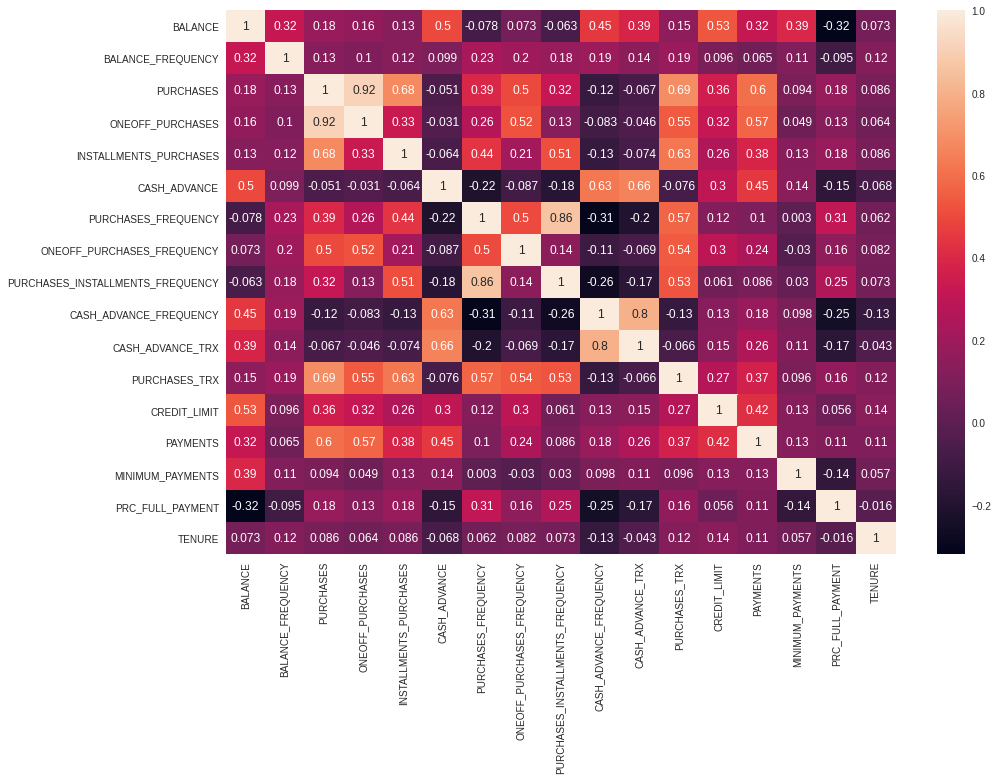

In [20]:
f, ax=plt.subplots(figsize=(15,10))
sns.heatmap(correclations, annot=True)

The diagonal of the matrix contains the covariance between each variable and itself. The other values in the matrix represent the covariance between the other features. Light color represent positive covariance.

There are some strong positive correlations between:
 - PURCHASES and ONEOFF_PURCHASES
 - PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY
 - CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX. 

There are some strong negative correlations between:
   - BALANCE with PURCHASES_FREQUENCY, PRC_FULL_PAYMENT
   - CASH_ADVANCE with PURCHASES_FREQUENCY, PRC_FULL_PAYMENT
   - CASH_ADVANCE_FREQUENCY and PURCHASES_FREQUENCY

### 3.3 Data scaling
The are huge differences between values in certain columns. In order to turn the valueas in the same range, the data will be scaled using StandardScaler.

In [21]:
correclations.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143


In [22]:
scaler = StandardScaler()

In [23]:
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [24]:
data_scaled.shape

(8950, 17)

In [25]:
data_scaled_df = pd.DataFrame(data=data_scaled, columns=data.columns )
data_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068


## 4. 'Elbow Method' - selecting the optimal number of clusters  
In order to choose the best number of clusters Within Clusters Sum of Squeres (WCSS) will be calculated. First, for each cluster the distances between observation points and centroids are calculated, then are sqered in order to get rid of negative values and then sum them up.
### 4.1 WCSS calculation

In [26]:
score_1 = []

range_value = range(1,20)

for i in range_value:
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    score_1.append(kmeans.inertia_)

### 4.2 'Elbow Method' application - plot of WCSS vs. clusters

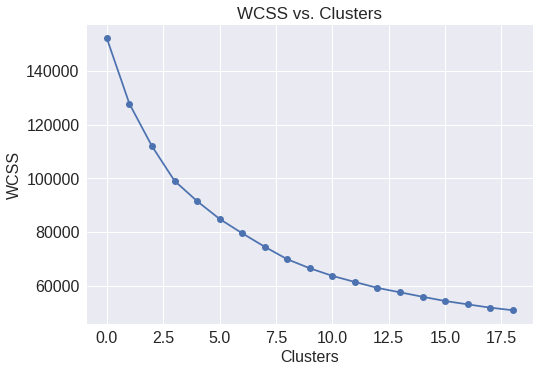

In [27]:
plt.style.use('seaborn')
plt.plot(score_1, 'bo-')
plt.title('WCSS vs. Clusters', size=17)
plt.xlabel('Clusters', size=16)
plt.ylabel('WCSS', size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

According to the 'Elbow Method', the optimal number of clustres is 7 or 8, because the value of WCSS decreases slightly for bigger number of clusters.

## 5. K-Means Method - application
K-Means is an unsupervised learning algorithm. It works by grouping data points (clustering). The algorithm groups the observations with similar attribute values by measuring the Euclidean distance between points.
### 5.1 Applicaction of K-Means algorithm for 8 clusters

In [28]:
# Application of KMeans for 8 clusters
kmeans = KMeans(8)
kmeans.fit(data_scaled_df)
labels = kmeans.labels_

In [29]:
labels

array([0, 1, 3, ..., 5, 5, 5], dtype=int32)

In [30]:
labels.shape

(8950,)

In [31]:
labels.max()

7

In [32]:
kmeans.cluster_centers_.shape

(8, 17)

### 5.2 Table of cluster centres with values of fearures specific for each cluster 

In [33]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.012547,0.403899,-0.359739,-0.245674,-0.399141,-0.095171,-0.858842,-0.406621,-0.751926,0.101634,-0.030659,-0.484099,-0.307485,-0.252612,-0.010889,-0.457013,0.273817
1,1.678830,0.395364,-0.220879,-0.158355,-0.231407,2.008653,-0.486227,-0.216912,-0.421614,1.921639,1.933725,-0.270682,1.018801,0.805652,0.524321,-0.395714,0.069991
2,-0.700956,-2.143508,-0.311205,-0.235887,-0.302358,-0.319880,-0.556658,-0.445148,-0.439473,-0.520753,-0.376148,-0.419741,-0.174766,-0.192120,-0.256461,0.283077,0.199473
3,-0.161515,0.393230,0.474744,0.619012,-0.014858,-0.333204,0.948802,1.885412,0.093435,-0.406855,-0.323678,0.535266,0.386453,0.102693,-0.162589,0.417727,0.261590
4,0.934901,0.467049,2.252953,1.707412,2.190297,-0.192704,1.160751,1.548096,1.257221,-0.310075,-0.208712,2.800594,1.235324,1.282259,0.575854,0.273318,0.333736
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,-0.366738,0.332912,-0.037266,-0.244405,0.360714,-0.363349,0.997195,-0.386968,1.212615,-0.474686,-0.360924,0.189694,-0.261900,-0.216912,-0.044791,0.321269,0.256709


### 5.3 Inversion of scaled data into orginal data

In [34]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers.shape

(8, 17)

### 5.4 Characteristics of clusters
This table presents 8 clusters with corresponding features values. 

In [35]:
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[data.columns])
cluster_centers.transpose()

,0,1,2,3,4,5,6,7
BALANCE,1590.590034,5058.818176,105.494632,1228.294018,3510.393168,865.015978,5567.142164,801.140875
BALANCE_FREQUENCY,0.972951,0.970929,0.369494,0.970423,0.987910,0.795051,0.957273,0.956134
PURCHASES,234.616494,531.293227,338.310626,2017.503243,5816.674519,385.181720,24957.905000,923.584980
ONEOFF_PURCHASES,184.668174,329.600092,200.913113,1619.871135,3426.390962,233.977974,18186.875667,186.775400
INSTALLMENTS_PURCHASES,50.129795,201.809462,137.648613,397.632107,2391.725865,151.686061,6771.029333,737.256667
CASH_ADVANCE,779.293029,5191.109532,308.067290,280.127558,574.762188,1122.064941,1858.844605,216.910839
PURCHASES_FREQUENCY,0.145656,0.295204,0.266937,0.871151,0.956216,0.408846,0.910556,0.890573
ONEOFF_PURCHASES_FREQUENCY,0.081155,0.137748,0.069661,0.764913,0.664285,0.116344,0.773889,0.087018
PURCHASES_INSTALLMENTS_FREQUENCY,0.065603,0.196877,0.189780,0.401571,0.864089,0.275196,0.754444,0.846361
CASH_ADVANCE_FREQUENCY,0.155482,0.519684,0.030936,0.053728,0.073095,0.196911,0.083333,0.040155


### 5.5 Descriptions of main customer segments 

According to the results, there are 4 significantly different customer groups:

1. Customers - Transactors. Customers, which are very carefull with money. They have low BALANCE, amount of purchases, PRC_FULL_PAYMENT and PURCHASES_FREQUENCY as well as low PRC_FULL_PAYMENT 51% 

2. Customers, who use credit cards as a loan indicate a very high CASH_ADVANCE, CASH_ADVANCE_FREQUENCY (0.5), CASH_ADVANCE_TRX but low PURCHASES_FREQUENCY and PRC_FULL_PAYMENT (0.03)

3. Customers - VIPs with a very high percentage of PAYMENTS, ONEOFF_PURCHASES and CREDIT_LIMIT.

4. Customers with low TENURE, low BALANCE and low percentage of PURCHASES.

### 5.6 Concatanating cluster labes to original dataset

In [36]:
data_clusters = pd.concat([data, pd.DataFrame({'Clusters':labels})], axis=1)
data_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


### 5.7 Histograms of various clusters

In [37]:
len(data_clusters.columns)

18

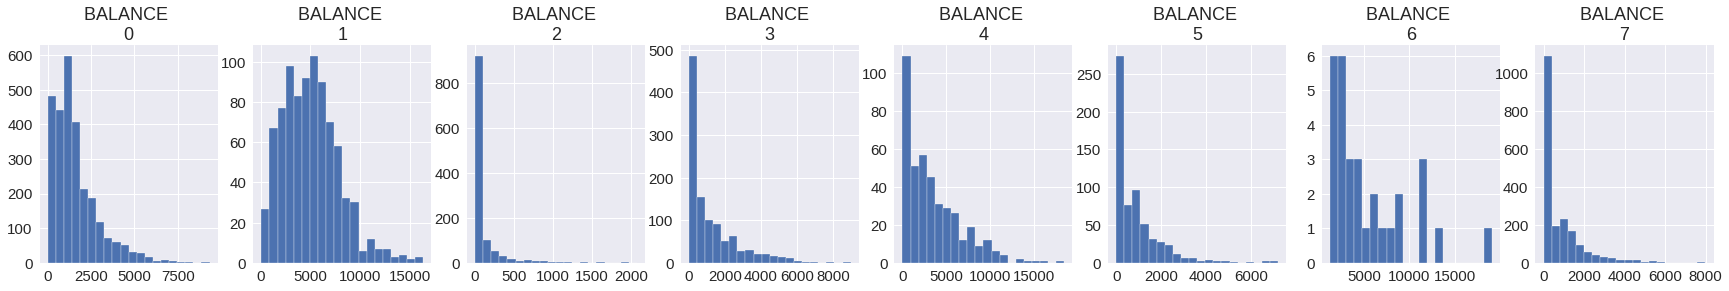

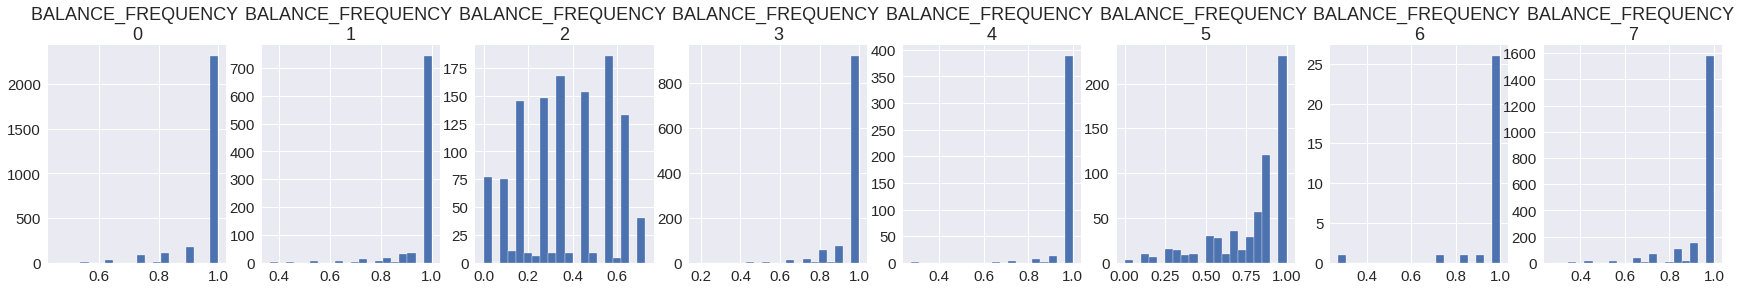

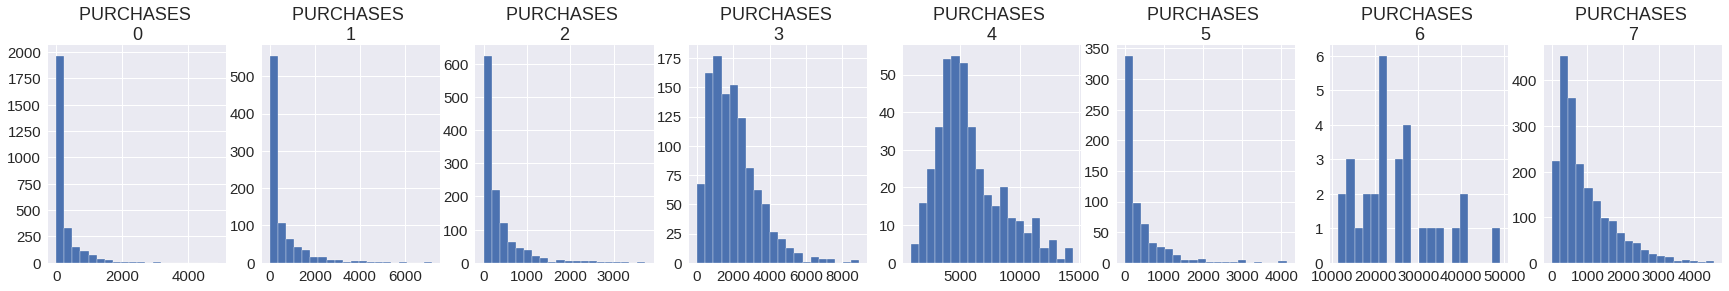

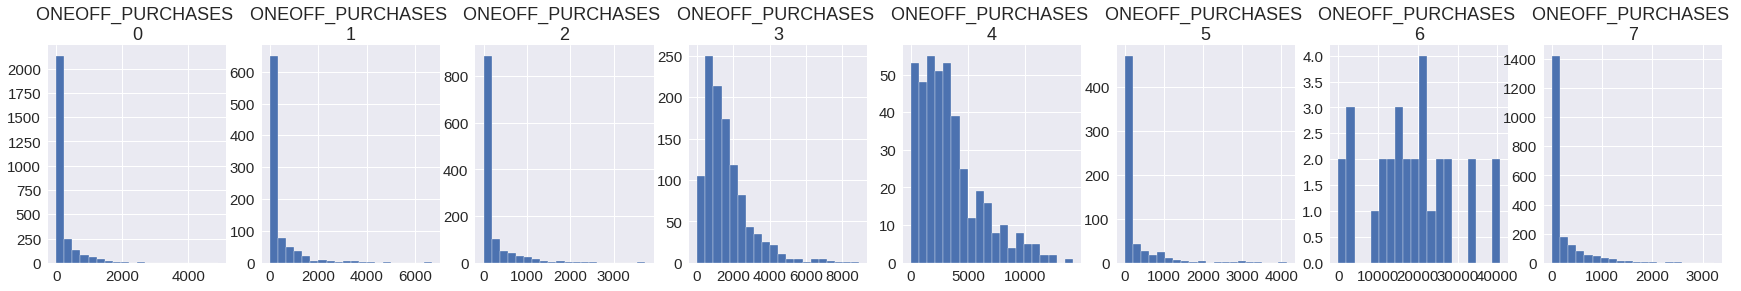

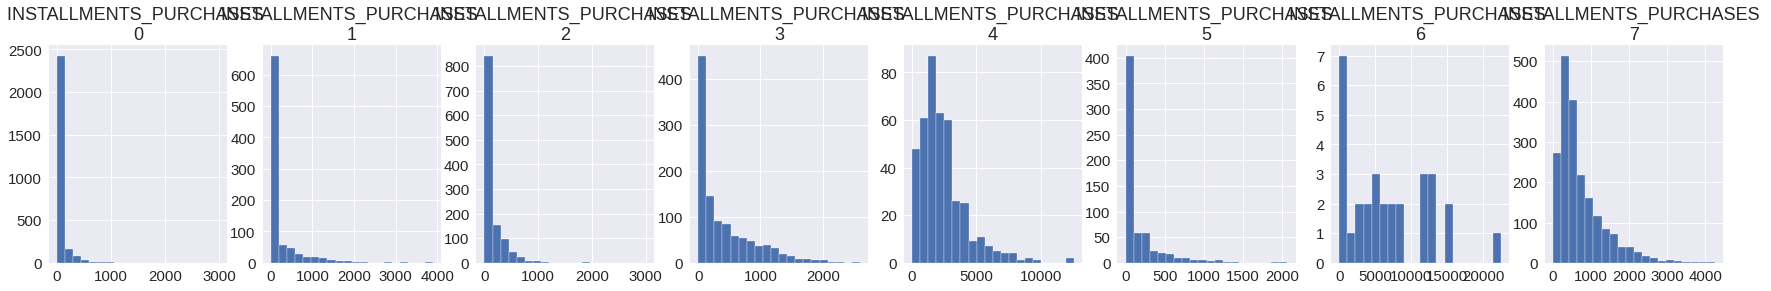

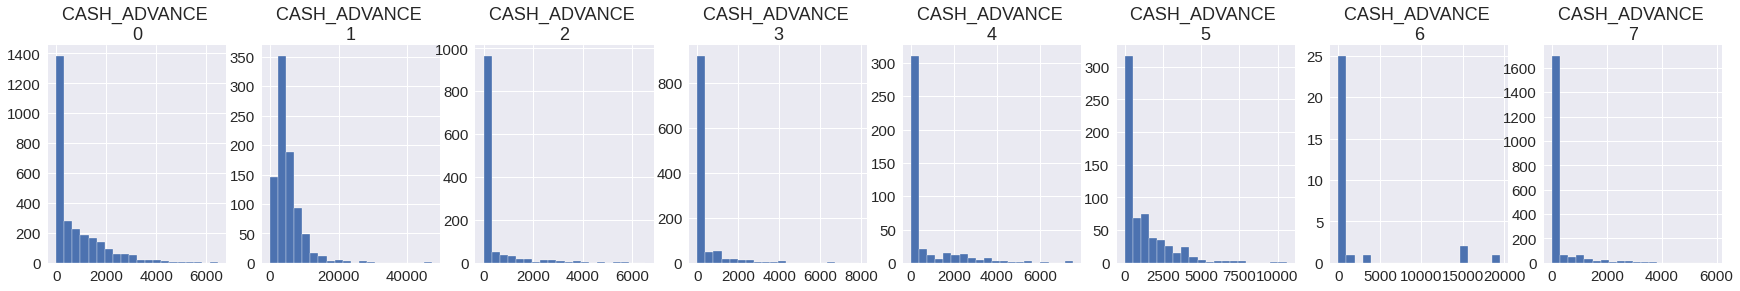

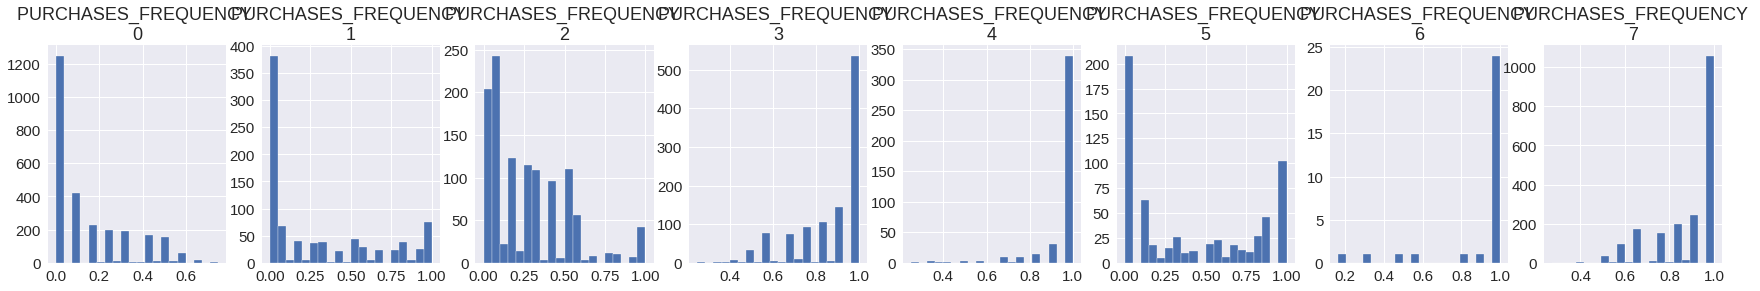

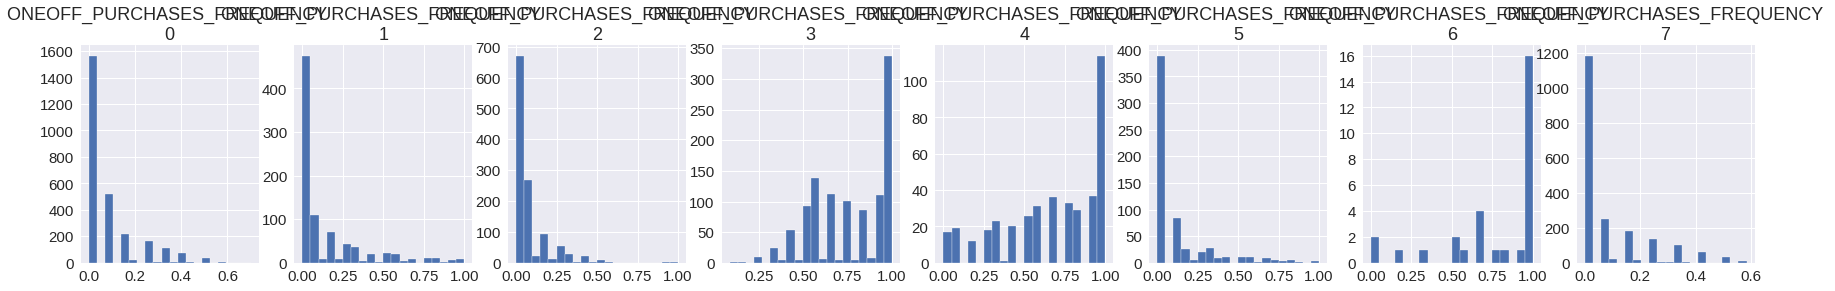

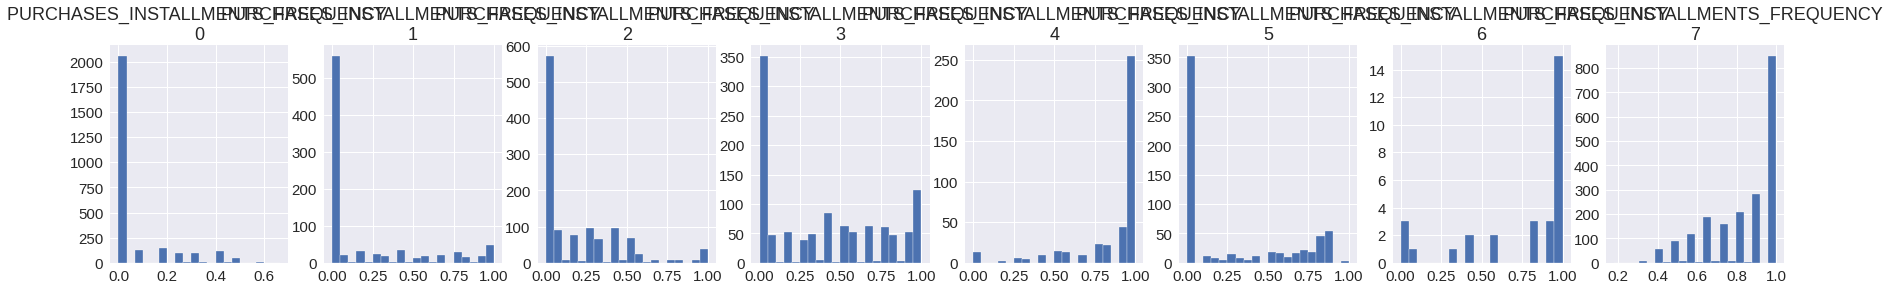

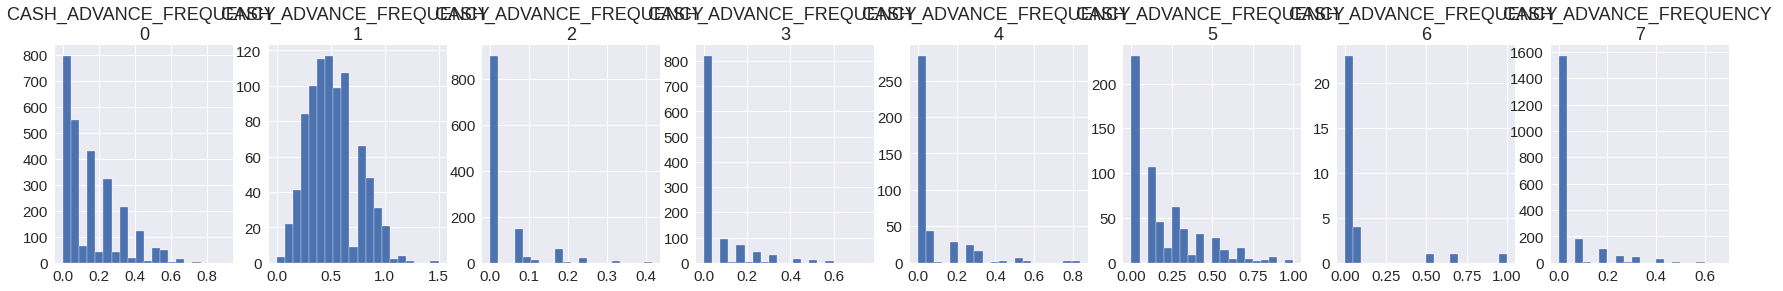

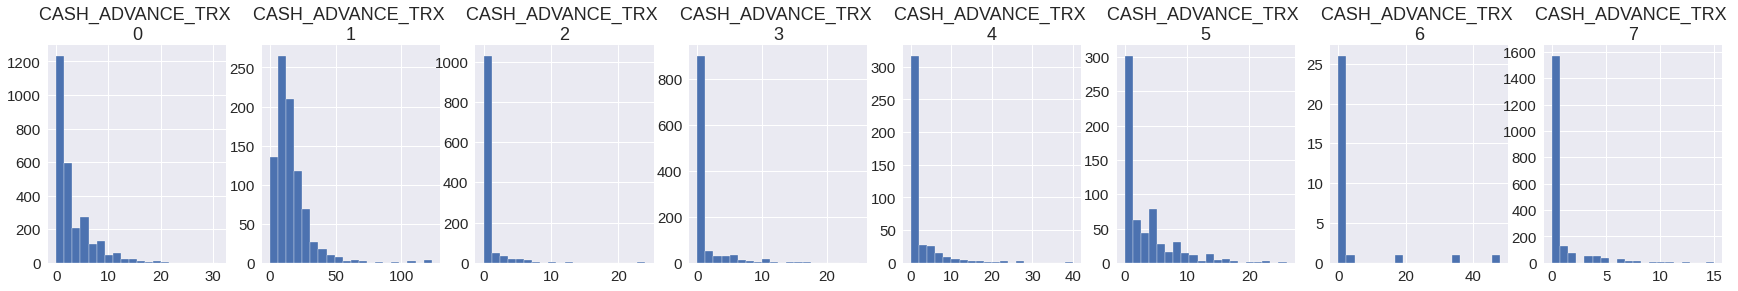

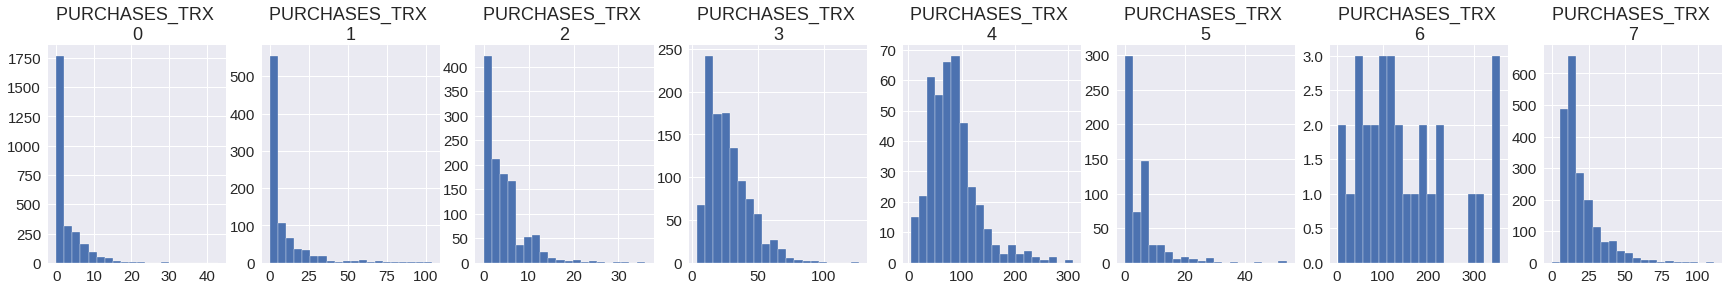

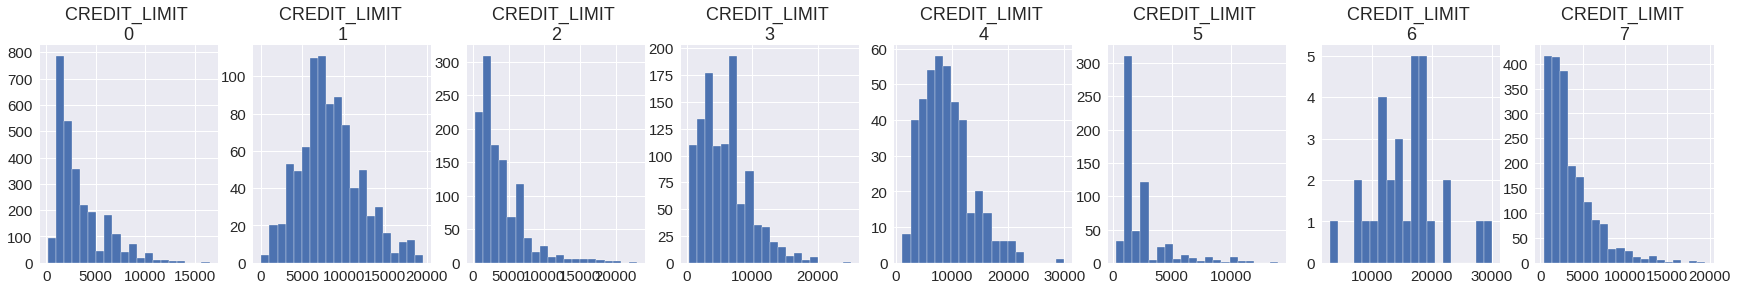

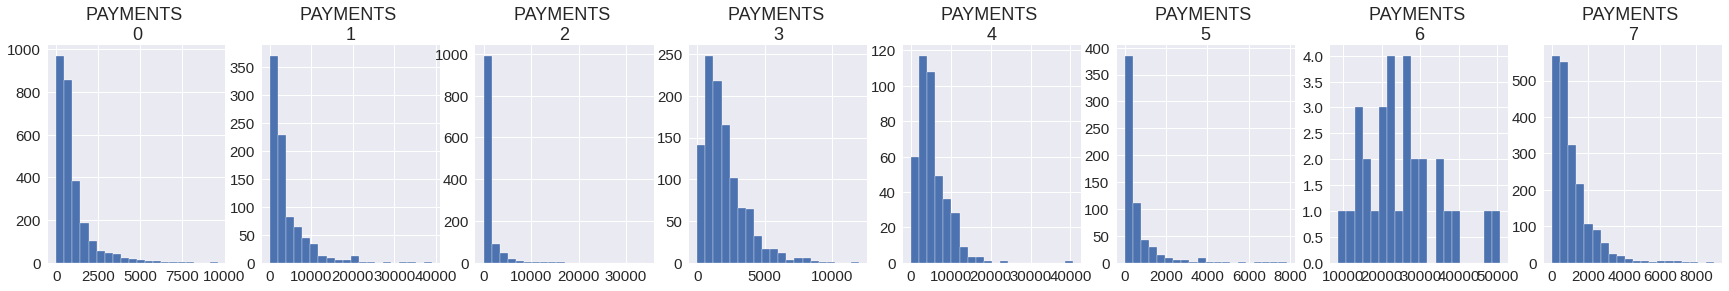

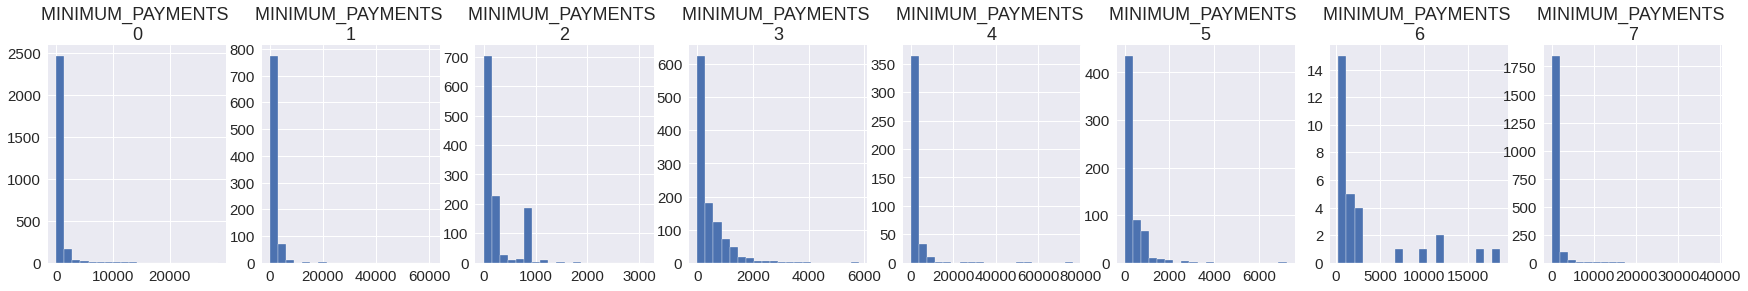

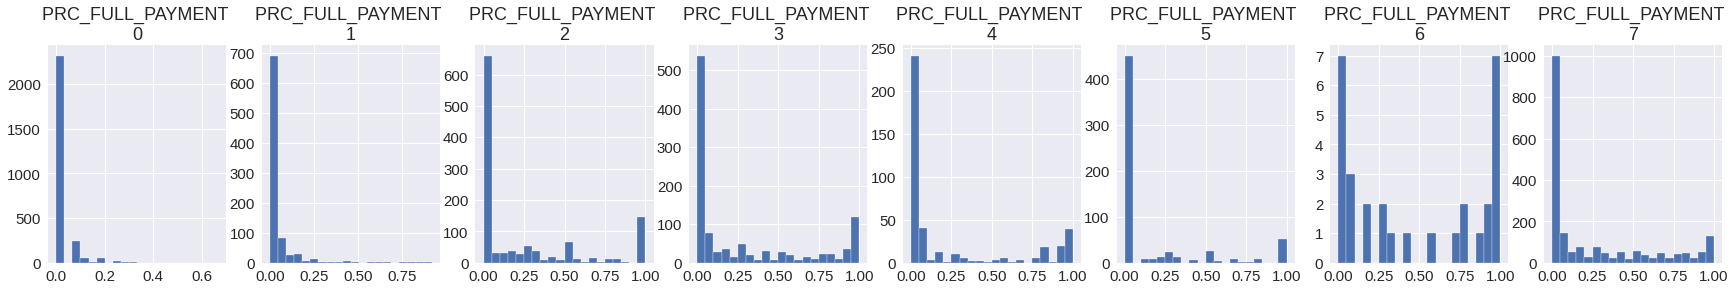

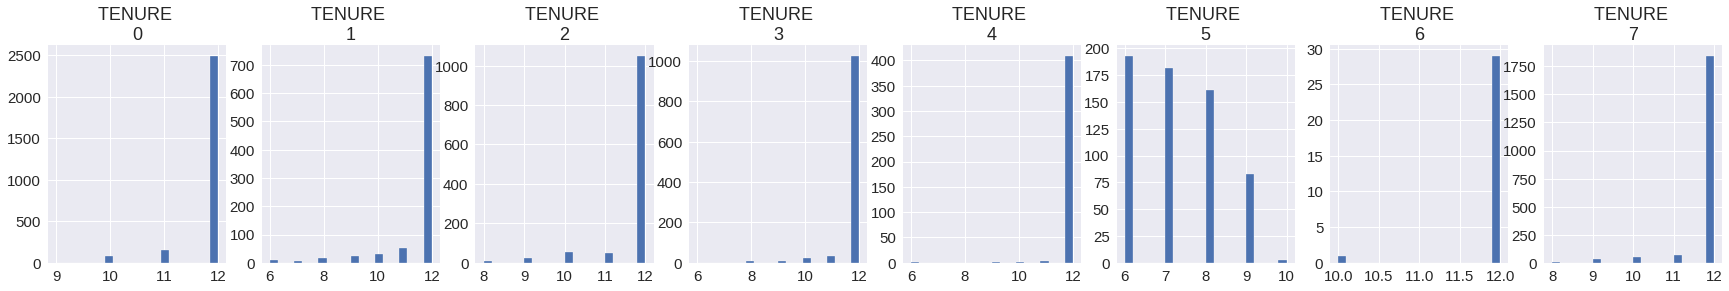

In [73]:
for i in data.columns:
    plt.figure(figsize=(30,4))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = data_clusters[data_clusters['Clusters']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \n{}'.format(i,j), size=18)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plt.show()


## 6. Principal Component Analysis (PCA)
PCA is unsupervised machine learning algorythm, which performs a linear dimensionality reduction while attempting at keeping original information unchanged. 

PCA works by trying to find a set of new features called components. Components are composites of uncorrelated given input features.

### 6.1. Calculation of 2 principal components

In [39]:
pca = PCA(2)
pca.fit(data_scaled_df)
principal_comp = pca.transform(data_scaled_df)
principal_comp

array([[-1.6822201 , -1.07645043],
       [-1.13829375,  2.50647836],
       [ 0.96968423, -0.38351975],
       ...,
       [-0.92620386, -1.81078592],
       [-2.33655153, -0.65796523],
       [-0.55642185, -0.40046585]])

pca = PCA(whiten=True)
whitened = pca.fit_transform(data_scaled_df)
whitened.shape

In [40]:
pca.components_.shape

(2, 17)

In [41]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138294,2.506478
2,0.969684,-0.383520
3,-0.873628,0.043164
4,-1.599433,-0.688580


In [42]:
pca_df_cluster = pd.concat([pca_df, pd.DataFrame({'Clusters':labels})], axis=1)
pca_df_cluster.head()

,pca1,pca2,Clusters
0,-1.682220,-1.076450,0
1,-1.138294,2.506478,1
2,0.969684,-0.383520,3
3,-0.873628,0.043164,0
4,-1.599433,-0.688580,0


### 6.2. Vizualisation of clusters after PCA

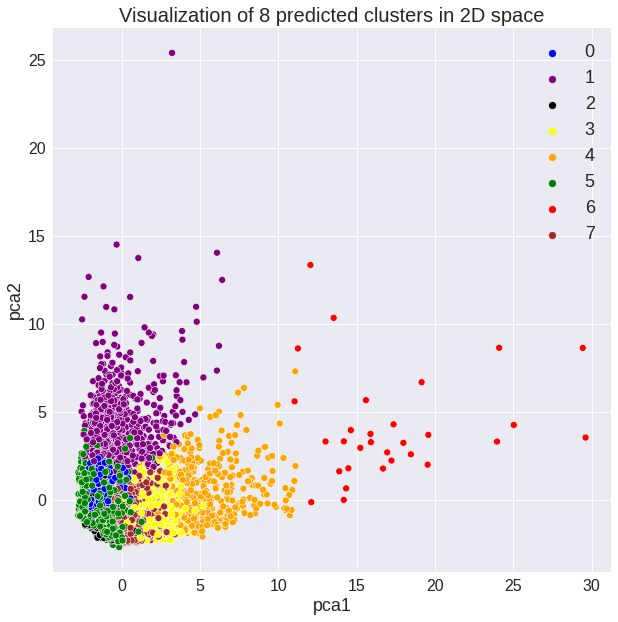

In [74]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Clusters', data= pca_df_cluster, palette=['blue', 'purple', 'black', 'yellow', 'orange', 'green', 'red','brown'])
plt.title('Visualization of 8 predicted clusters in 2D space', size=20)
plt.xlabel('pca1', fontsize=18)
plt.ylabel('pca2', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.show()

There are clearly 4 different segments that are different from others. The rest of them overlap and interfere with each other.

In [44]:
pca.components_.shape

(2, 17)

In [45]:
df_components = pd.DataFrame(pca.components_, columns=data.columns)
df_components

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.101078,0.120043,0.411641,0.346407,0.336815,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390696,0.211662,0.266249,0.060351,0.132113,0.081021
1,0.403959,0.130537,0.041037,0.062871,-0.018532,0.439242,-0.190781,-0.017923,-0.178601,0.434082,0.419733,-0.019393,0.238676,0.257477,0.166969,-0.190025,-0.004326


Text(159.0, 0.5, 'Components')

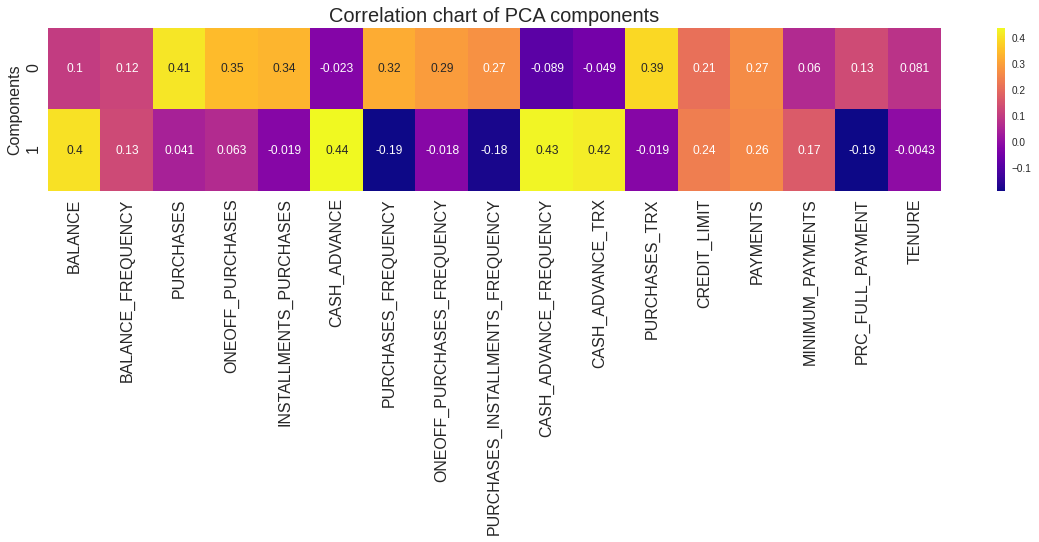

In [75]:
plt.figure(figsize=(20,3))
sns.heatmap(df_components, cmap='plasma', annot=True)
plt.title('Correlation chart of PCA components', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('Components', fontsize=16)

## 7. Autoencoder
Autoencoders are a type of Artificial Neural Network that are used to perform a task of data encoding (representation learning). They use the same input and output data. Thanks to autoendoders the dimension of the imput data with correlated features can be redused (bottleneck) then transponded weights are applied to decode the compressed information back to the form of the input data. The idea is to apply K-Means algorythm on the copressed data.

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, Dense, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD, Adam

Building Artificial Neural Networks with dimensions of 17 features.

ReLU stands for Rectified Linear Unit and is a non-linear activation function. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

'ADAM' - addapive Moment Estimation - an optimiser

### 7.1. Creating Artificial Neural Networks

In [48]:
input_df = Input(shape=(17))

x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)


# Encoded layer
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

# Creating Decoder Network
decoded = Dense(17, activation='relu', kernel_initializer='glorot_uniform')(x)


learning_rate = 0.02
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)


# Autoencoder
autoencoder = Model(input_df, decoded)

# Creating Encoder
encoder = Model(input_df, encoded)


autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

In [49]:
data_scaled_df.shape

(8950, 17)

### 7.2. Copressing data with ANN

In [50]:
autoencoder.fit(data_scaled_df, data_scaled_df, batch_size=130, epochs=25, verbose=1)

Epoch 1/25
69/69 [==============================] - 1s 16ms/step - loss: 0.7583
Epoch 2/25
69/69 [==============================] - 1s 15ms/step - loss: 0.6387
Epoch 3/25
69/69 [==============================] - 1s 15ms/step - loss: 0.5837
Epoch 4/25
69/69 [==============================] - 1s 15ms/step - loss: 0.5278
Epoch 5/25
69/69 [==============================] - 1s 16ms/step - loss: 0.4938
Epoch 6/25
69/69 [==============================] - 1s 18ms/step - loss: 0.4382
Epoch 7/25
69/69 [==============================] - 1s 16ms/step - loss: 0.4206
Epoch 8/25
69/69 [==============================] - 1s 18ms/step - loss: 0.4075
Epoch 9/25
69/69 [==============================] - 1s 17ms/step - loss: 0.3994
Epoch 10/25
69/69 [==============================] - 1s 20ms/step - loss: 0.3955
Epoch 11/25
69/69 [==============================] - 1s 20ms/step - loss: 0.3907
Epoch 12/25
69/69 [==============================] - 1s 16ms/step - loss: 0.3876
Epoch 13/25
69/69 [==================

In [51]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [52]:
autoencoder.layers[4].get_weights()

[array([[ 0.02075953,  0.0107696 ,  0.00170787, ..., -0.01925056,
         -0.0218255 , -0.02993597],
        [ 0.00695134,  0.01414607, -0.02499824, ...,  0.00100483,
         -0.02579511,  0.00015474],
        [-0.02764268, -0.01009318, -0.06166962, ..., -0.02164827,
         -0.03444986, -0.02266978],
        ...,
        [ 0.00457084, -0.07945416,  0.01484427, ...,  0.00346943,
          0.02086568, -0.04815734],
        [ 0.03606795, -0.04918055, -0.01268938, ..., -0.01645343,
          0.00222301,  0.00119064],
        [-0.01338777, -0.01431148, -0.02701384, ...,  0.01249745,
          0.01719282,  0.01693043]], dtype=float32),
 array([ 0.01836492, -0.03273263, -0.02362563, ..., -0.01980543,
        -0.02068731, -0.02365508], dtype=float32)]

In [53]:
autoencoder.layers[1].get_weights()[1]

array([0.367116  , 0.46855685, 0.37190148, 0.36081815, 0.37444758,
       0.36889392, 0.24232729], dtype=float32)

### 7.3. Application of 'Elbow Method' on copressed data

In [54]:
pred = encoder.predict(data_scaled)
pred.shape

(8950, 10)

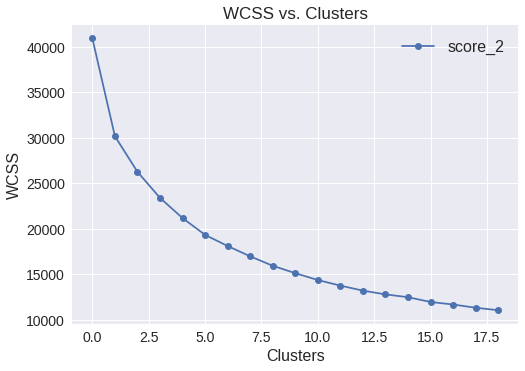

In [55]:
# Optimal number of clusters
score_2 = []

num_range = range(1,20)

for i in num_range:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    score_2.append(kmeans.inertia_)
   
    
# Ploting 
plt.plot(score_2, 'bo-', label='score_2')
plt.title('WCSS vs. Clusters', size=17)
plt.xlabel('Clusters', size=16)
plt.ylabel('WCSS', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

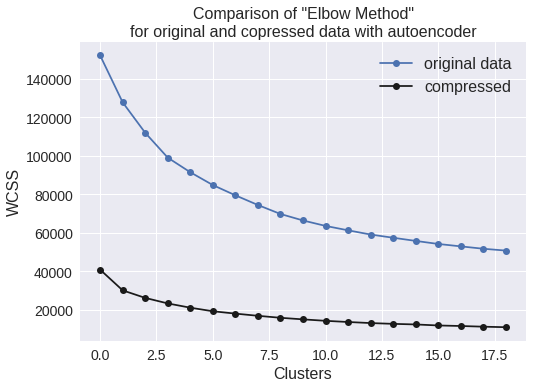

In [66]:
plt.plot(score_1 , 'bo-', label='original data')
plt.plot(score_2, 'bo-', color='k', label='compressed')
plt.xlabel('Clusters', size=16)
plt.ylabel('WCSS', size=16)
plt.title('Comparison of "Elbow Method"\nfor original and copressed data with autoencoder', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

### 7.4. Application KMeans for 4 clusters

In [57]:
# K-Means
kmeans= KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(pred)
labels_NN = kmeans.labels_
labels_NN.shape

(8950,)

In [58]:
kmeans.cluster_centers_.shape

(4, 10)

In [59]:
# concat the labels to the data frame

data_clusters_NN = pd.concat([data, pd.DataFrame({'clusters':labels_NN})], axis=1)
data_clusters_NN.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### 7.5. Application of PCA (2 principal components)

In [60]:
# PCA
pca = PCA(2)
principal_comp = pca.fit_transform(pred)
principal_comp.shape
pca_df = pd.DataFrame(data=principal_comp, columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-0.958901,-0.242577
1,0.662213,-1.143229
2,0.247292,0.178291
3,-0.769029,-0.012843
4,-0.872877,-0.224929
...,...,...
8945,-0.963587,0.311270
8946,-1.011017,0.125607
8947,-1.032800,0.017476
8948,-1.026415,-0.277576


In [61]:
# Concat column with clusters to the data frame
pca_df = pd.concat([pca_df, pd.DataFrame({'clusters':labels_NN})], axis=1)
pca_df                                                     

,PCA1,PCA2,clusters
0,-0.958901,-0.242577,1
1,0.662213,-1.143229,2
2,0.247292,0.178291,1
3,-0.769029,-0.012843,1
4,-0.872877,-0.224929,1
...,...,...,...
8945,-0.963587,0.311270,1
8946,-1.011017,0.125607,1
8947,-1.032800,0.017476,1
8948,-1.026415,-0.277576,1


### 7.6. Visualization of 4 predicted clusters in 2D space

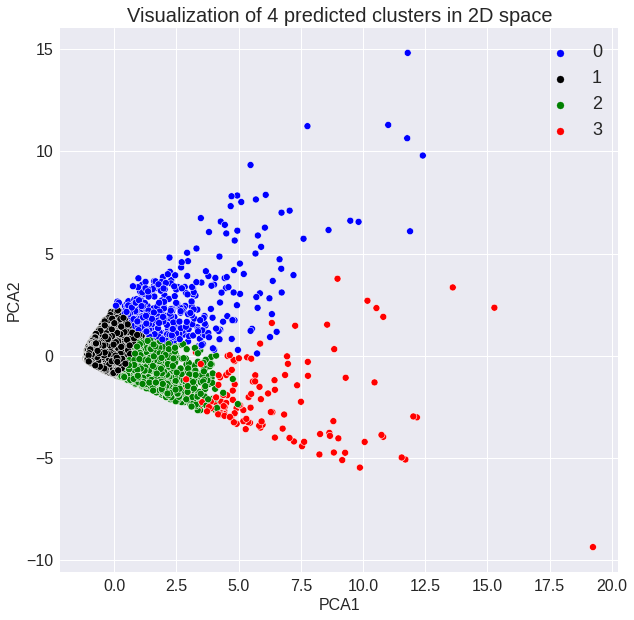

In [69]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='clusters', data= pca_df, palette=['blue', 'black', 'green', 'red'])
plt.title('Visualization of 4 predicted clusters in 2D space', size=20)
plt.xlabel('PCA1',fontsize=16)
plt.ylabel('PCA2',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [63]:
data_clusters_NN = pd.concat([data, pd.DataFrame({'clusters_NN':labels_NN})], axis=1)
data_clusters_NN.shape

(8950, 18)

### 7.7. Visualization of 4 clusters with corresponding features values

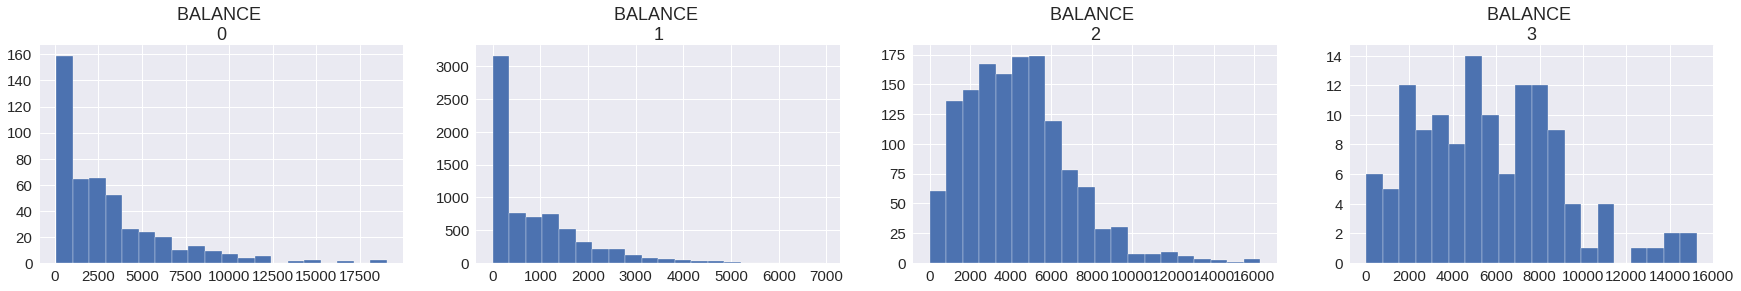

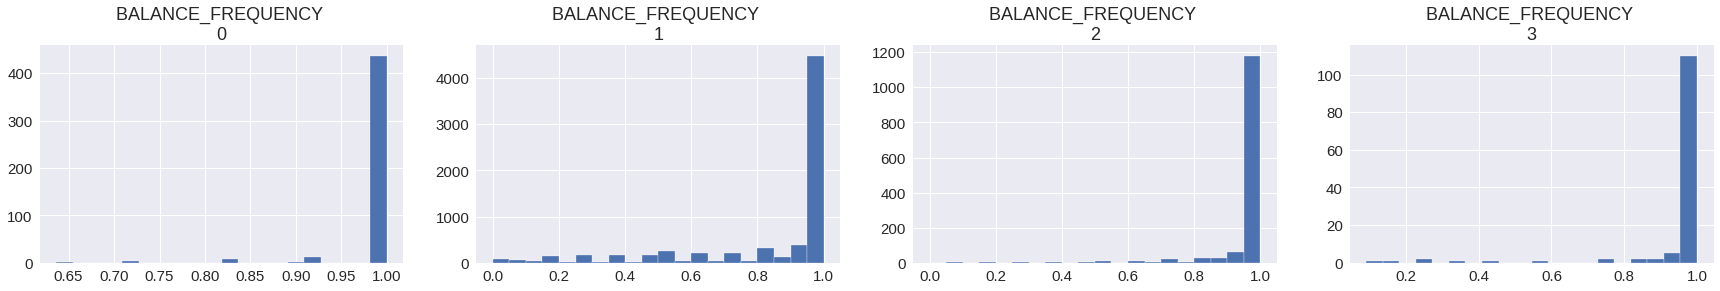

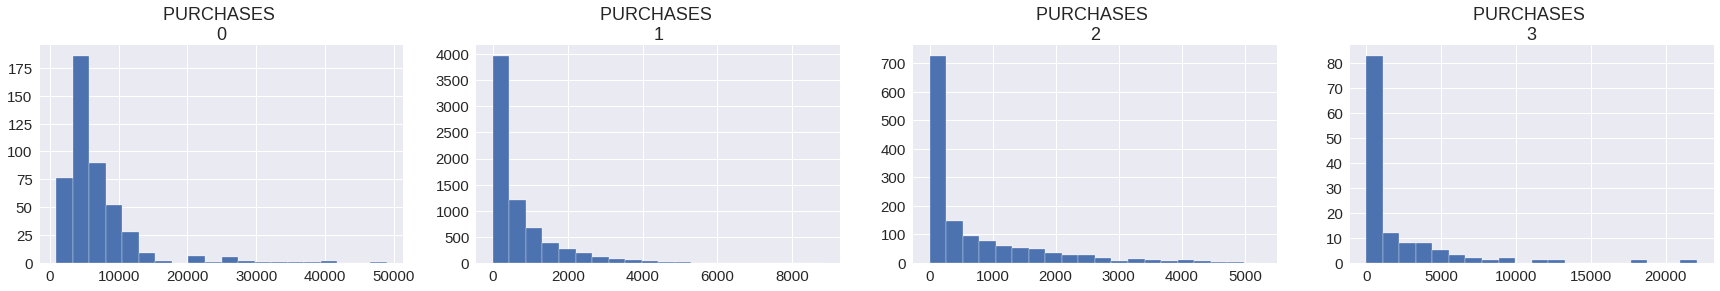

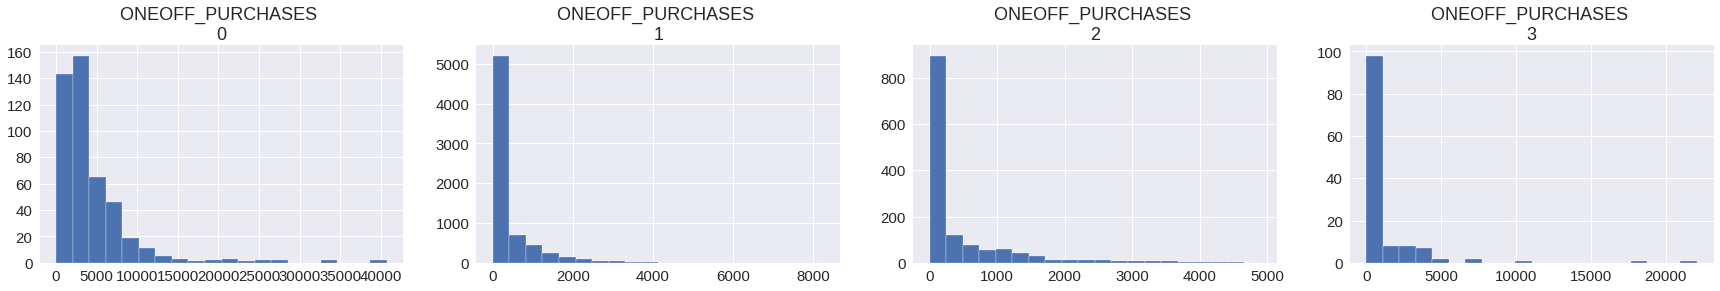

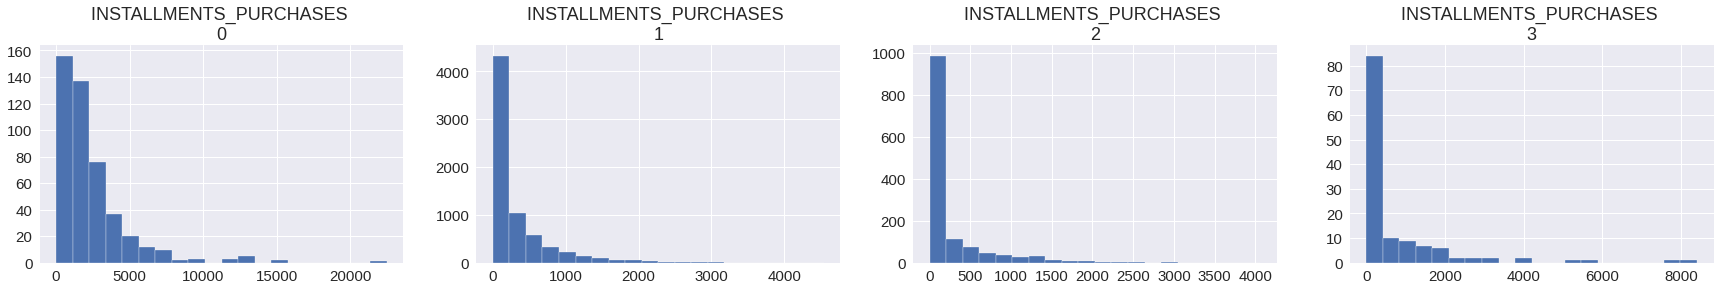

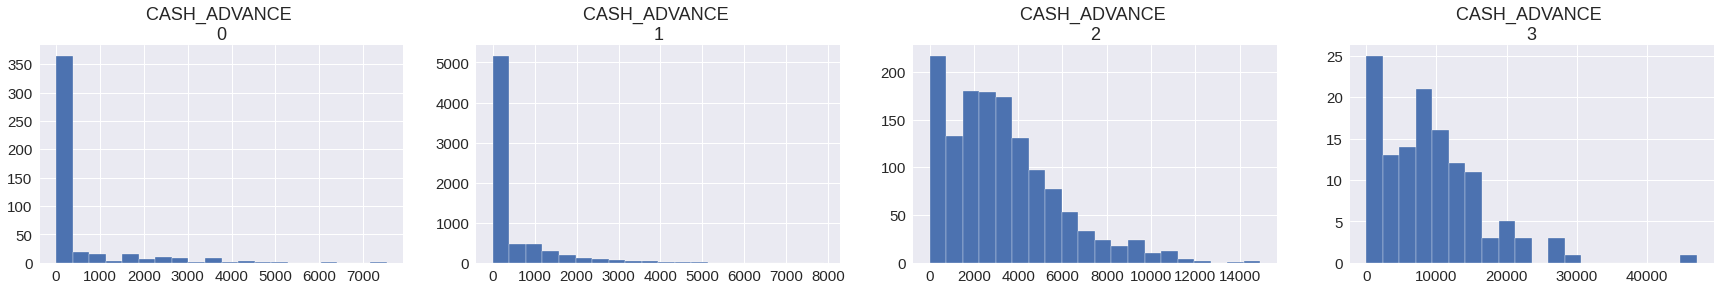

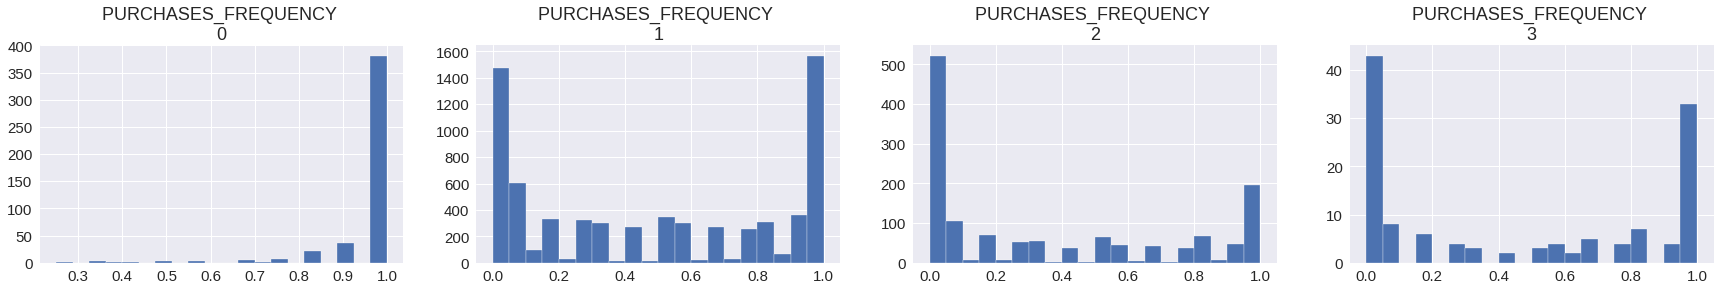

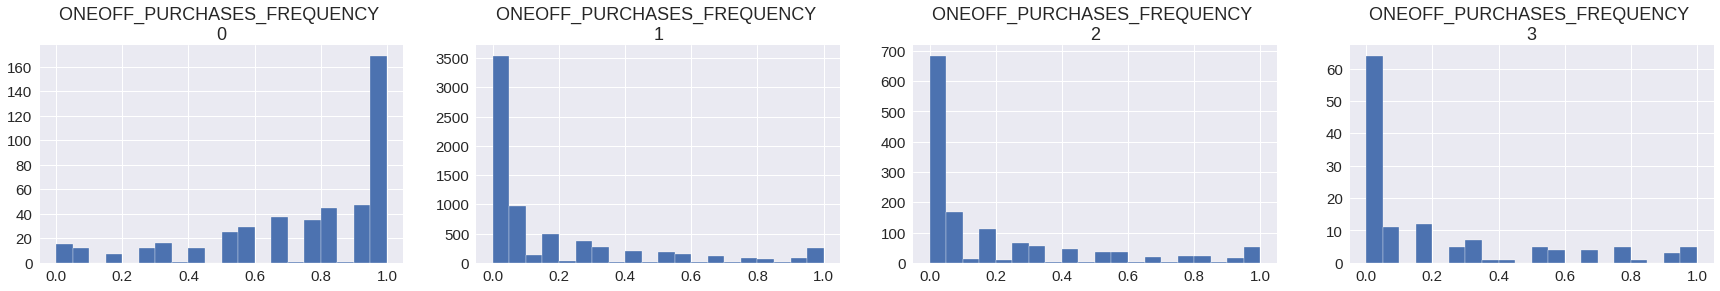

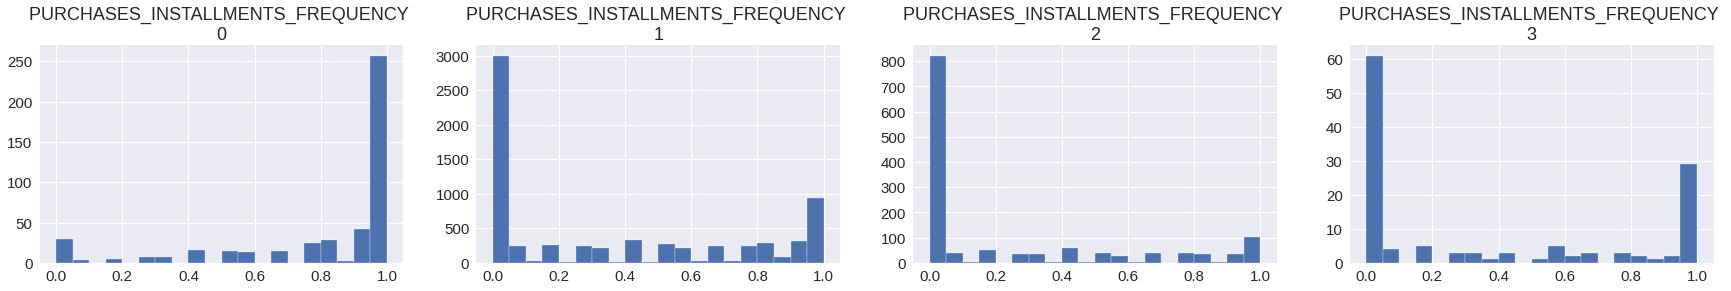

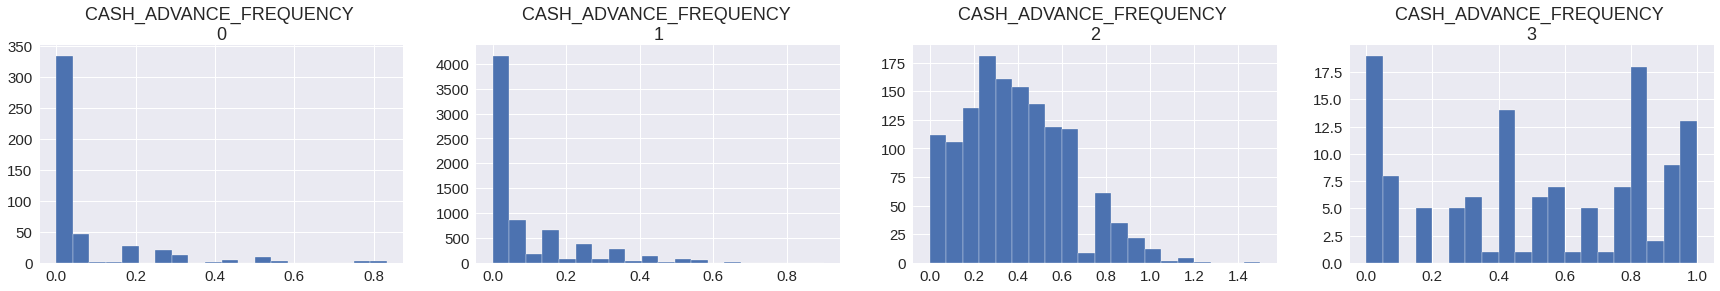

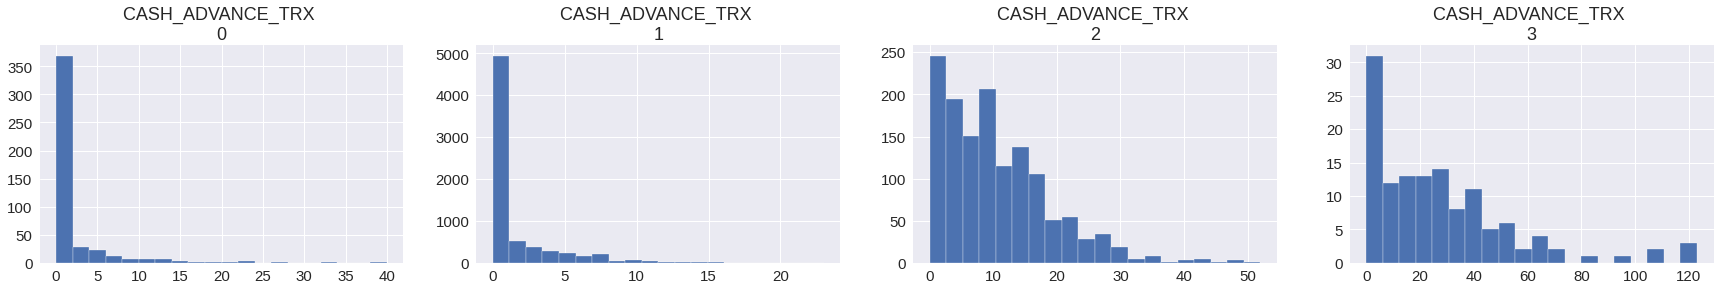

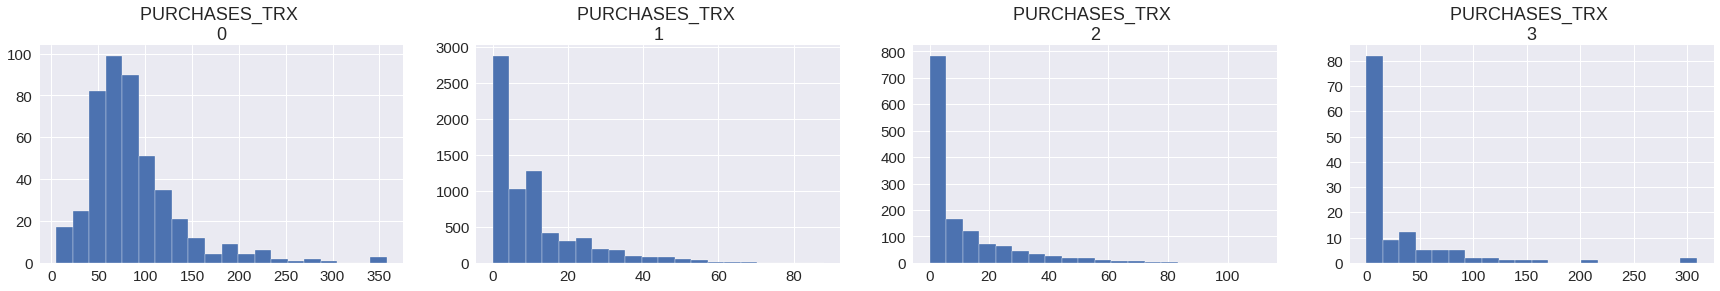

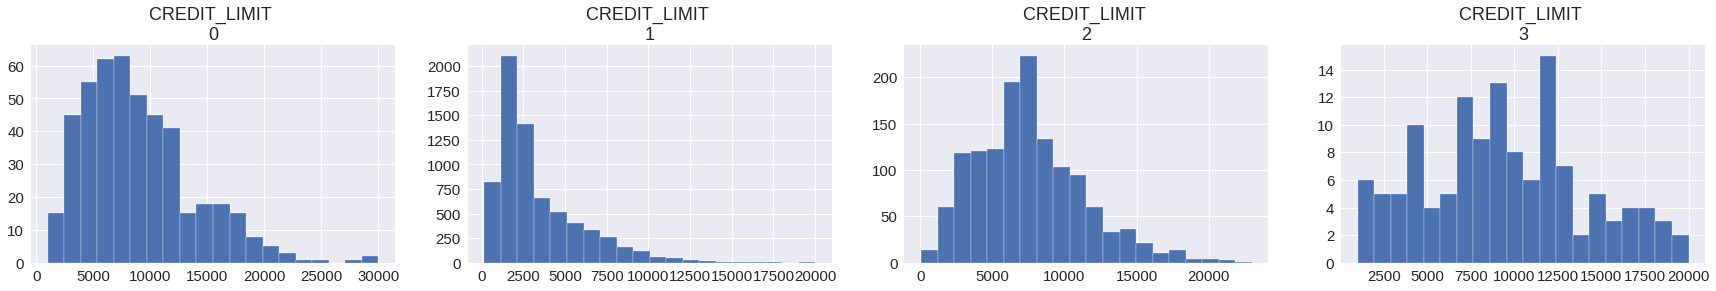

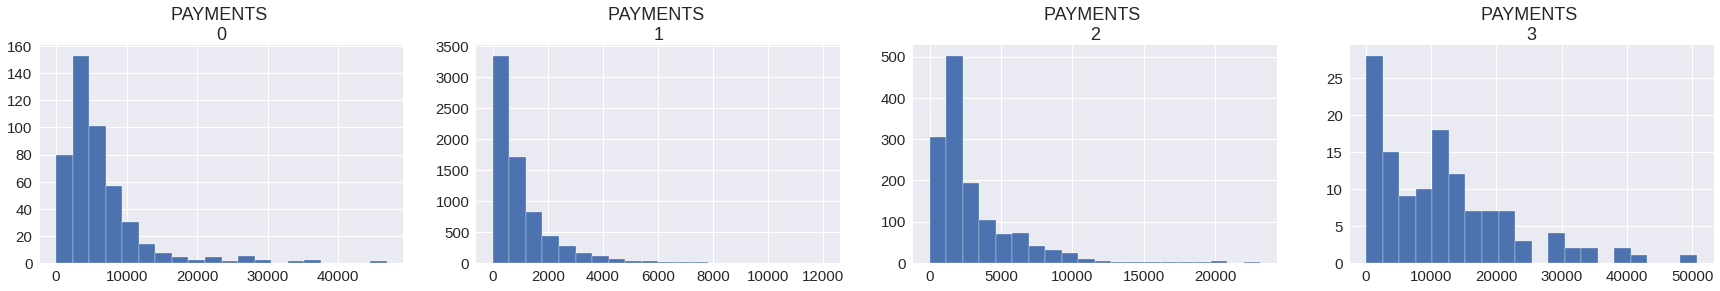

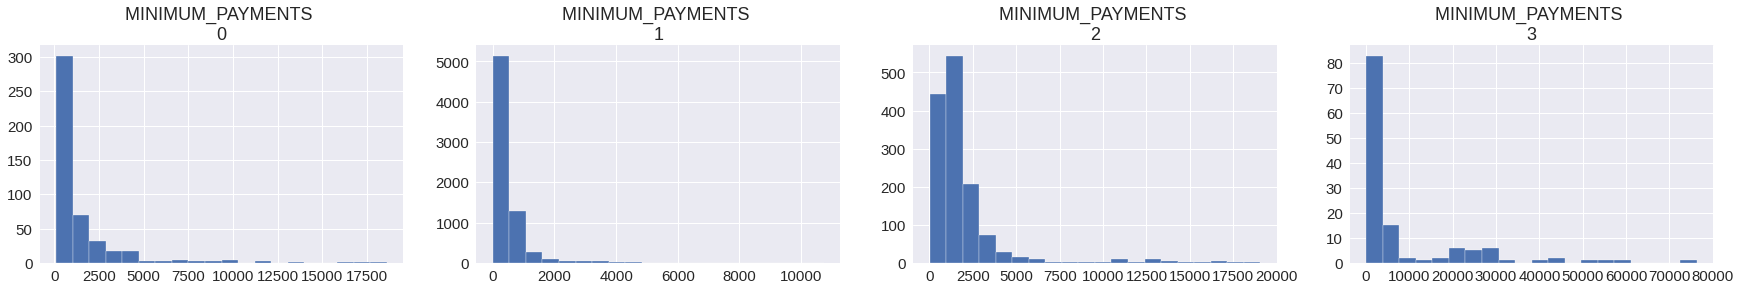

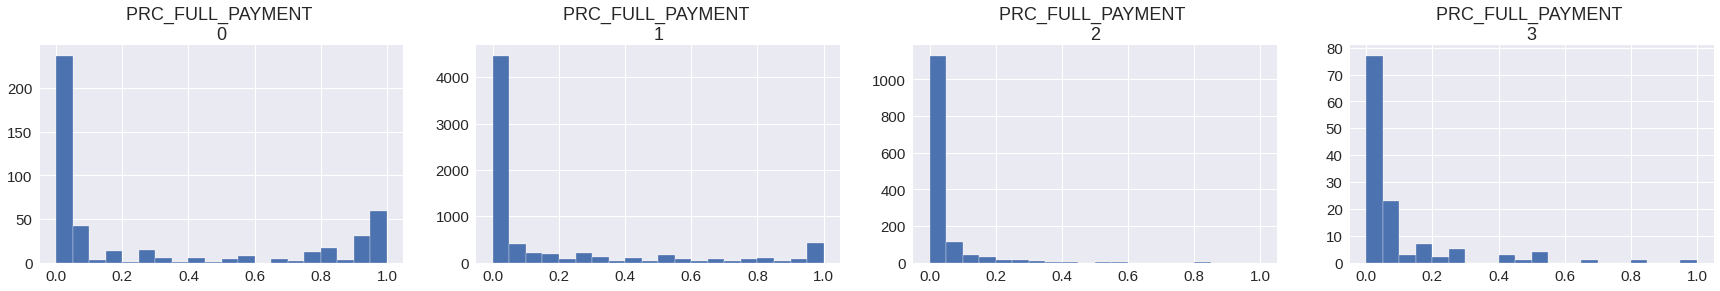

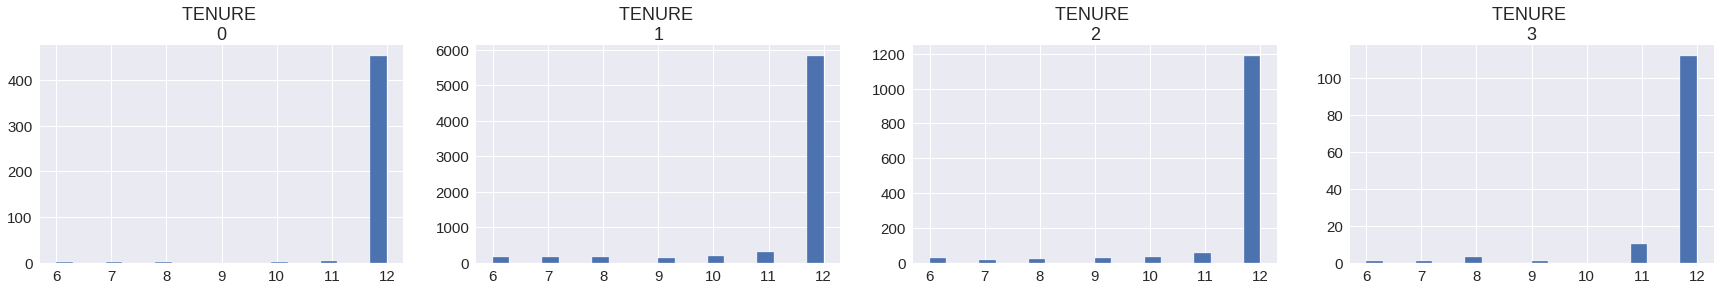

In [64]:
for i in data.columns:
    plt.figure(figsize=(30,4))
    for j in range(4):
        plt.subplot(1, 4, j+1)
        cluster = data_clusters_NN[data_clusters_NN['clusters_NN']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \n{}'.format(i,j), size=18)
        plt.xticks(size=15)
        plt.yticks(size=15)
    plt.show()


## Conclusion

The work in this notbook is based on dataset providing detailed information about 8950 bank customers, which are using credit card. Most of the clients were using it during 12 years. Thanks to Autoencoder, the informations about the features were reduced from 17 to 10. Thanks to the application of KMeans and PCA to compressed data, 4 different customer groups were identified. Unfortunatelly the value of loss function after the last epoche is above 0.3, what suggest the need of better adjustment of  that the parameters of artifical neural networks should to be better adjusted.